<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 2
<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div><br>

The goal is to compare `dense neural networks` and `convolutional neural networks` on `Fashion mnist` data.



## Import packages needed (and set seed)

Since Keras in part of TensorFlow 2.x, we import keras from tensorflow and use tenserflow.keras.xxx to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.


Zalando is Europe's leading online fashion platform for women, men and children. `Fashion-MNIST` is a dataset of their product images. Just like `MNIST` dataset, the `Fashion-MNIST` also consists of 70,000 grayscale images of 28x28 pixels divided into 60,000 training images and 10,000 test images. Each image is labeled with with an integer from 0 to 9 representing 10 classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot', respectively. `Fashion-MNIST` is intended to serve as a direct drop-in replacement for the original `MNIST` dataset for benchmarking machine learning algorithms since the the original `MNIST` was found to be too easy for the current machine learning models. In particular, Fashion-Mist shares the same image size and structure of training and testing splits as `MNIST`. Also like `MNIST` it comes prepackaged in `tf.Keras`. Use

```python
fashion_mnist.load_data()
```
to the get these datasets (and the corresponding labels) as Numpy arrays. See the `Fashion-MNIST` 


<div class="alert alert-block alert-info">
<b>Fashion-MNIST</b><br> 
https://github.com/zalandoresearch/fashion-mnist<br>
GitHub page for a lot more information about the data sets and benchmarks for 129 classifiers trained on the data:</div>

In [1]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.datasets import fashion_mnist

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.3.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [5]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Environment

In [6]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Loading Fashion MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It comes prepackaged as part of tf.Keras. Use the `tf.keras.datasets.fashion_mnist.load_data` to the get these datasets (and the corresponding labels) as Numpy arrays.

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
* x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
* y_train, y_test: uint8 arrays of digit labels (integers in range 0-9)

## EDA Training and Test Datasets

* Imported 60000 examples for training and 10000 examples for test 
* Imported 60000 labels for training and 10000 labels for test 

In [8]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t\t{}'.format(test_images.shape))
print('test_labels:\t\t{}'.format(test_labels.shape))

train_images:	(60000, 28, 28)
train_labels:	(60000,)
test_images:		(10000, 28, 28)
test_labels:		(10000,)


### Review labels for training dataset

In [9]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [9 0 0 3 0 2 7 2 5 5]

This output the numeric label, need to convert to item description


### Find frequency of each label in the training and test data

In [10]:
Counter(train_labels).most_common()

[(9, 6000),
 (0, 6000),
 (3, 6000),
 (2, 6000),
 (7, 6000),
 (5, 6000),
 (1, 6000),
 (6, 6000),
 (4, 6000),
 (8, 6000)]

In [11]:
Counter(test_labels).most_common()

[(9, 1000),
 (2, 1000),
 (1, 1000),
 (6, 1000),
 (4, 1000),
 (5, 1000),
 (7, 1000),
 (3, 1000),
 (8, 1000),
 (0, 1000)]

### Plot Examples

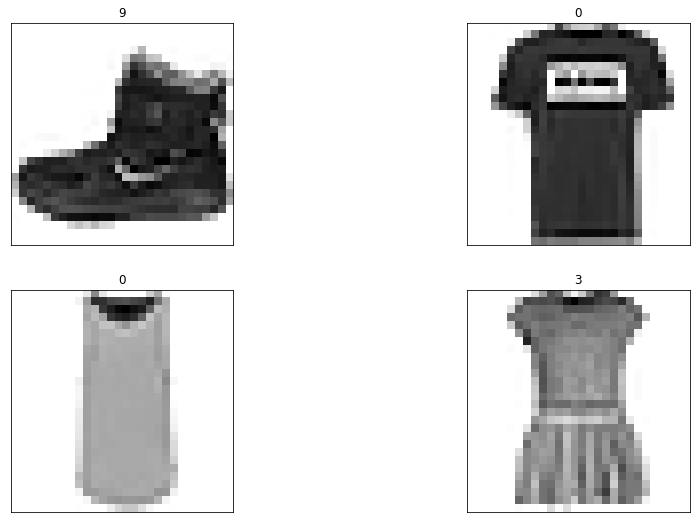

In [12]:
fig = plt.figure(figsize = (15, 9))

for i in range(4):
    plt.subplot(2, 2, 1+i)
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='binary')

## Preprocessing Data for Model Development

### Preprocessing the Examples

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label  |Class_  |
|-------|--------|
|0|	T-shirt/top  |
|1|	Trouser      |
|2|	Pullover     |
|3|	Dress        |
|4|	Coat         |
|5|	Sandal       |
|6|	Shirt        |
|7|	Sneaker      |
|8|	Bag          |
|9|	Ankle boot   |

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

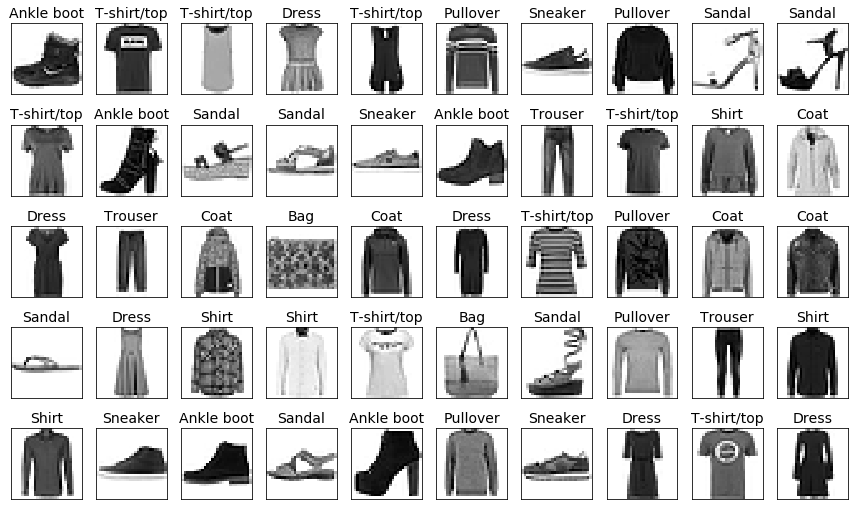

In [14]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(class_names[train_labels[i]], fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='binary')

### Preprocessing the Examples
 The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
 

1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = white
4. 255 = black

In [15]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [16]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images_norm = train_images.astype('float32')/255.

test_images = test_images.reshape((10000, 28, 28, 1))
test_images_norm = test_images.astype('float32')/255.

## Validating our approach

10,000 samples of our training data to use as a validation set. 

In [17]:
val_images_norm, train_images_norm = train_images_norm[:10000], train_images_norm[10000:] 
val_labels, train_labels = train_labels[:10000], train_labels[10000:]

In [18]:
val_images_norm.shape, val_labels.shape

((10000, 28, 28, 1), (10000,))

## Create the Model

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/CNNarchitecture3.png?raw=1">

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 4 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1639424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

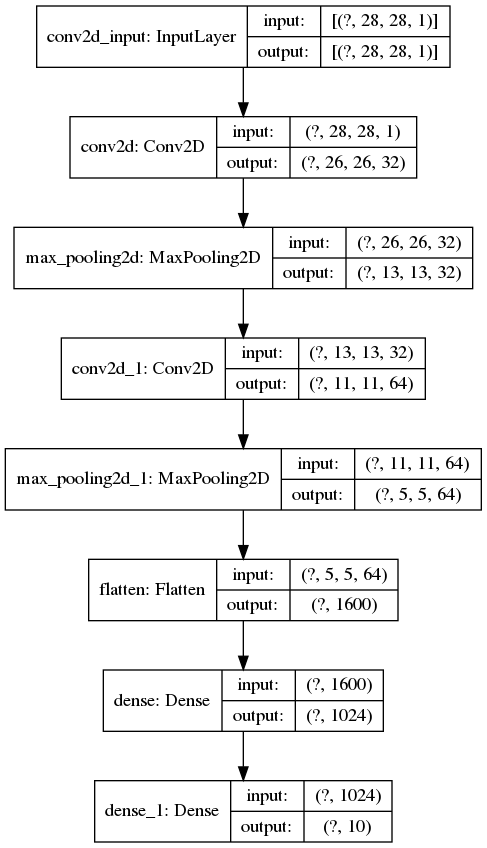

In [21]:
keras.utils.plot_model(model, "FashionMnist_model.png", show_shapes=True) 

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the model

In [23]:
history = model.fit(train_images_norm,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_images_norm,val_labels)
                   )

Epoch 1/20
98/98 [==============================] - 44s 454ms/step - loss: 1.7717 - accuracy: 0.7032 - val_loss: 1.6565 - val_accuracy: 0.8097
Epoch 2/20
98/98 [==============================] - 45s 455ms/step - loss: 1.6379 - accuracy: 0.8280 - val_loss: 1.6223 - val_accuracy: 0.8419
Epoch 3/20
98/98 [==============================] - 46s 466ms/step - loss: 1.6128 - accuracy: 0.8520 - val_loss: 1.6046 - val_accuracy: 0.8584
Epoch 4/20
98/98 [==============================] - 44s 452ms/step - loss: 1.6000 - accuracy: 0.8648 - val_loss: 1.5959 - val_accuracy: 0.8656
Epoch 5/20
98/98 [==============================] - 45s 454ms/step - loss: 1.5955 - accuracy: 0.8679 - val_loss: 1.5972 - val_accuracy: 0.8650
Epoch 6/20
98/98 [==============================] - 44s 452ms/step - loss: 1.5860 - accuracy: 0.8767 - val_loss: 1.5925 - val_accuracy: 0.8697
Epoch 7/20
98/98 [==============================] - 44s 451ms/step - loss: 1.5828 - accuracy: 0.8800 - val_loss: 1.5869 - val_accuracy: 0.8750

validation_data = Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data

## Evaluate the model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [24]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 4s 12ms/step - loss: 1.5672 - accuracy: 0.8954
test set accuracy:  89.53999876976013


## Predictions

In [25]:
preds = model.predict(test_images_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

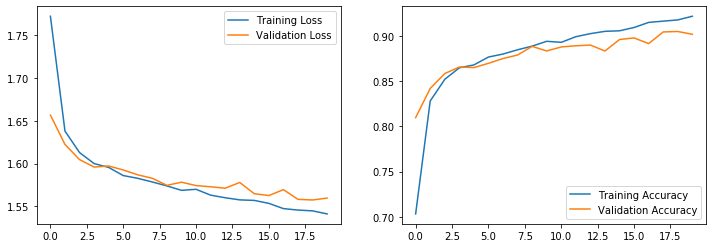

In [28]:
plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Creating confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

In [29]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(train_images_norm), axis=-1)
pred_classes

array([8, 7, 6, ..., 3, 0, 5])

In [30]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4496,    5,   95,  112,    4,    3,  315,    0,   28,    0],
       [   1, 4903,    2,   56,    4,    0,    3,    0,    4,    0],
       [  36,    6, 4596,   38,  127,    0,  170,    0,   11,    0],
       [  36,   12,   30, 4758,   59,    2,   81,    0,    3,    0],
       [   8,    7,  531,  189, 4000,    0,  282,    0,    9,    0],
       [   0,    0,    1,    1,    0, 4898,    1,   84,    1,   25],
       [ 487,   12,  419,  121,  159,    0, 3758,    0,   22,    1],
       [   0,    0,    0,    0,    0,   14,    0, 4849,    3,  112],
       [  12,    2,   21,    6,    6,    2,   14,    3, 4941,    3],
       [   0,    0,    0,    0,    0,   11,    0,   95,    1, 4893]], dtype=int32)>

|Label  |Class_  |
|-------|--------|
|0|	T-shirt/top  |
|1|	Trouser      |
|2|	Pullover     |
|3|	Dress        |
|4|	Coat         |
|5|	Sandal       |
|6|	Shirt        |
|7|	Sneaker      |
|8|	Bag          |
|9|	Ankle boot   |

### Visualizing the confusion matrix

<div class="alert alert-block alert-success">
<b>Code from chapter 3 of Hands on Machine Learning (A. Geron) </b><br>
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb<br>
To display a "heat map" of the confusion matrix. Then we normalize the confusion matrix so we can compare error rates</div><br>


<div class="alert alert-block alert-info">
<b>Hands On Machine Learning</b><br> 
https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html#classification_chapter<br>
</div>




Looks like 28 fours were misclassified as nines (and 10 nines were classifed fours). We display some of these misclassfications along with exam of fours and nines that were correctly identified.

In [31]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

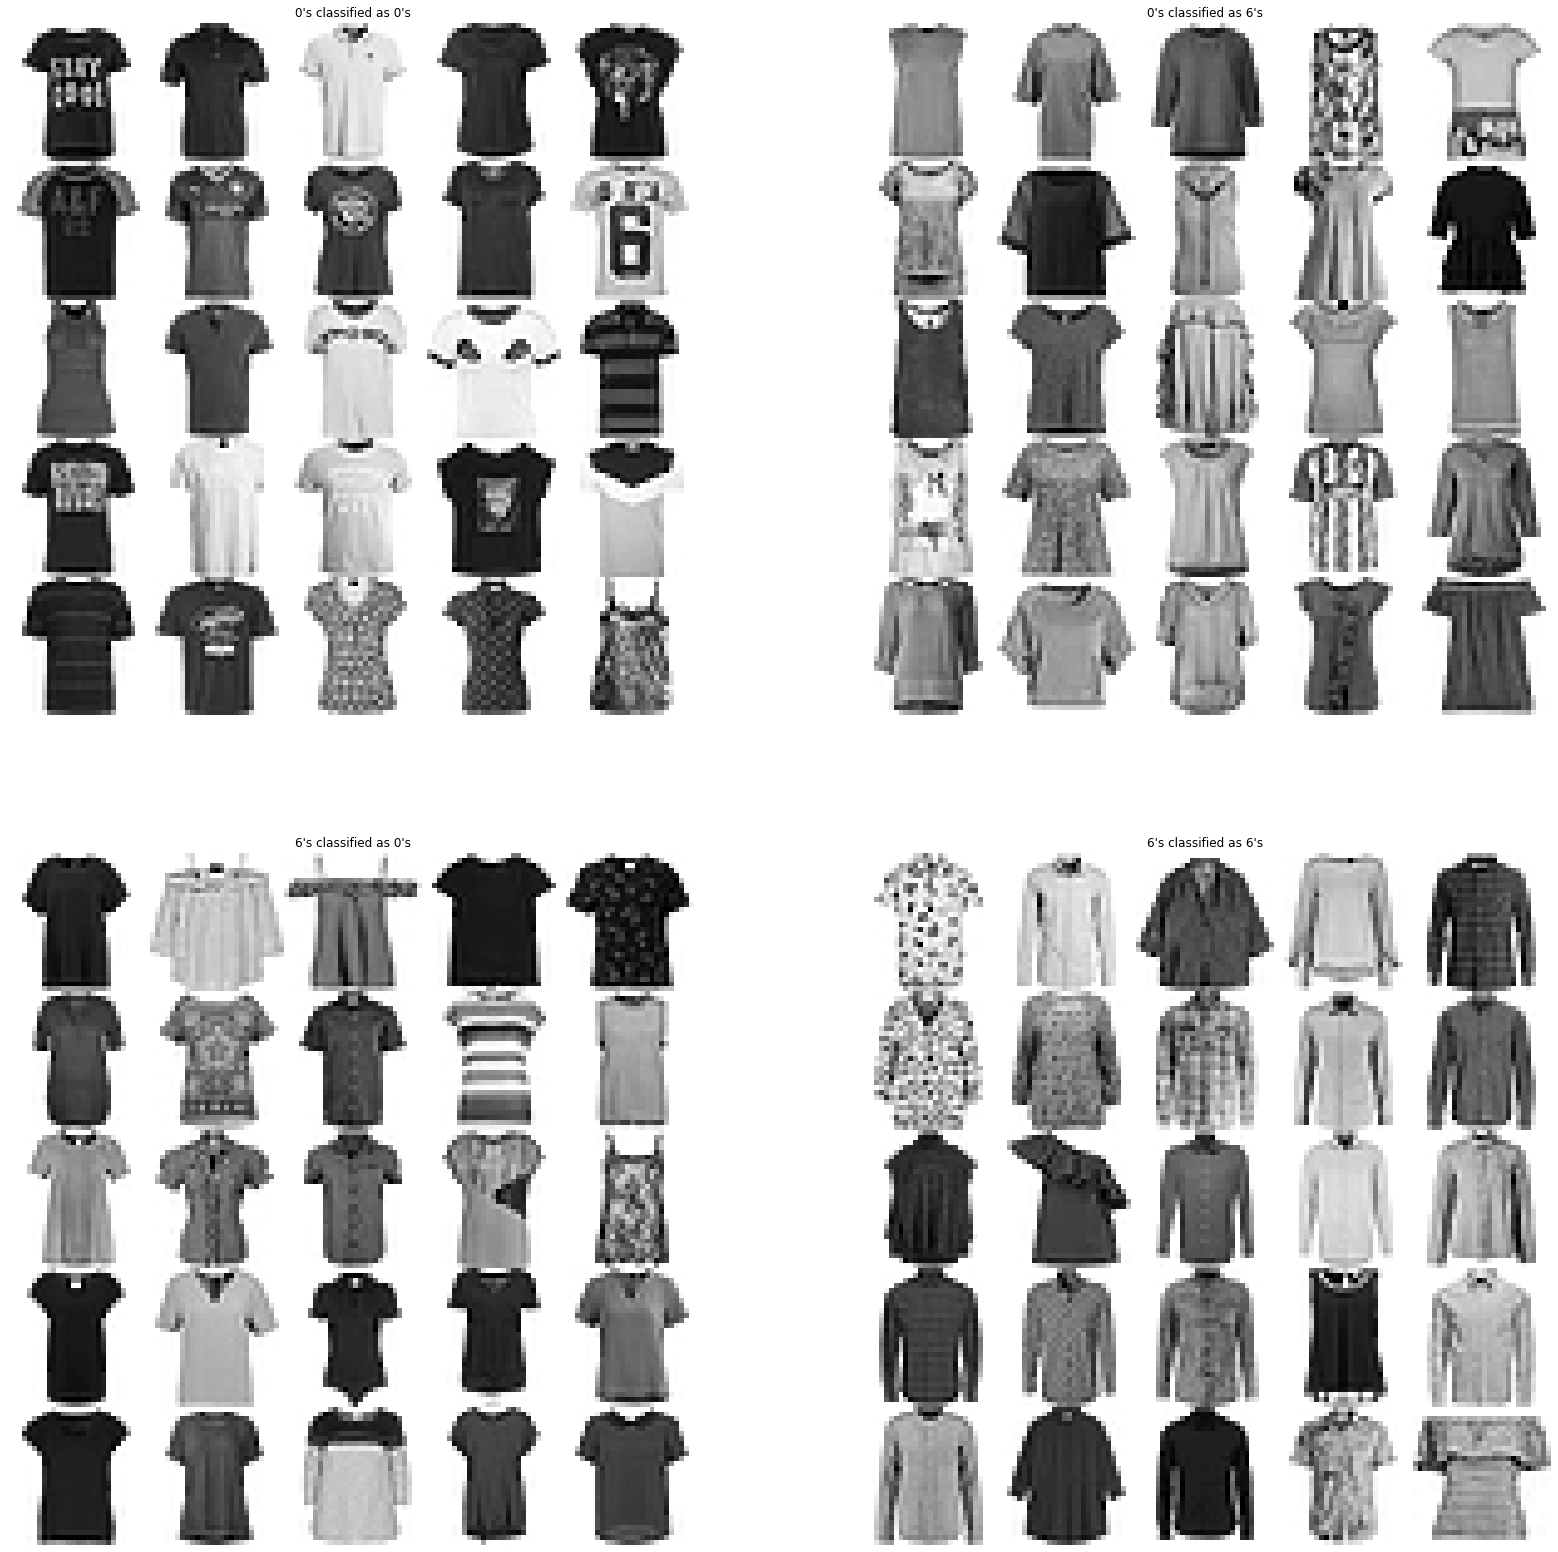

In [32]:
cl_a, cl_b = 0, 6
X_aa = train_images_norm[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images_norm[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images_norm[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images_norm[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(28,28))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

plt.show()

|Label  |Class_  |
|-------|--------|
|0|	T-shirt/top  |
|1|	Trouser      |
|2|	Pullover     |
|3|	Dress        |
|4|	Coat         |
|5|	Sandal       |
|6|	Shirt        |
|7|	Sneaker      |
|8|	Bag          |
|9|	Ankle boot   |

In [33]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,1.553576,0.90932,1.562683,0.8978
16,1.547477,0.91494,1.569545,0.8915
17,1.545762,0.91636,1.558263,0.9044
18,1.544841,0.91770,1.557523,0.9049
19,1.541277,0.92176,1.559718,0.9018


### Visualizaing convnet filters

In [34]:
#from tensorflow.keras import models

# Extracts the outputs of the all the layers
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [35]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'dense_1']

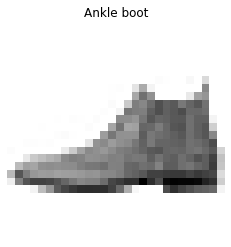

In [36]:
from tensorflow.keras.preprocessing import image
# import numpy as np

(_,_), (test_images, test_labels) = fashion_mnist.load_data()

img = test_images[0]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# https://www.tensorflow.org/tutorials/keras/classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(img, cmap="binary")
plt.axis('off')
plt.title(class_names[test_labels[0]], fontsize=12)
plt.show()

In [37]:
activations = activation_model.predict(img_tensor)
len(activations)

7

<div class="alert alert-block alert-info">
<b>Display All The Channels - Page 164</b><br> 
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb<br>
We use a loop to display all the channels of all the activations in the convolution and max pooling layers. This code comes from Chapter 5 Section 4 of the Chollet book:
</div>

/home/jensen116/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


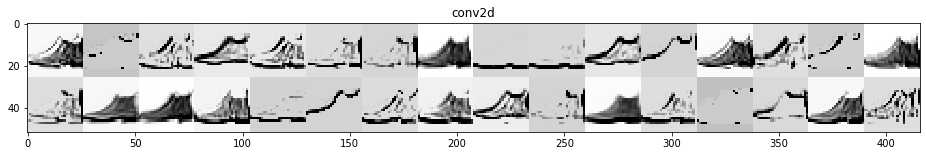

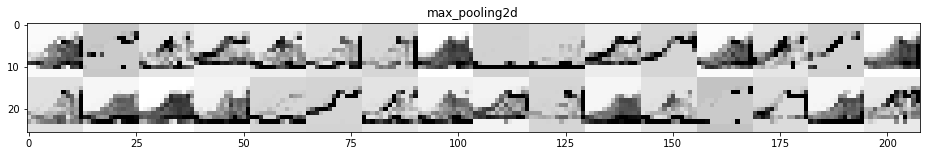

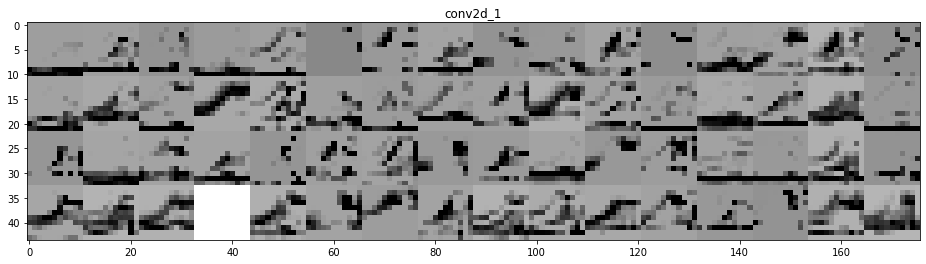

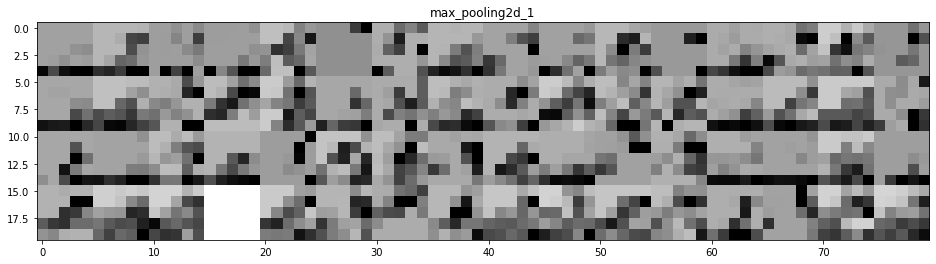

In [38]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    if layer_name == 'flatten': 
        break
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='binary')
    
plt.show()

### Image Data Augumentation

<div class="alert alert-block alert-info">
<b>Image Augumentions</b><br> 
https://www.kaggle.com/imrandude/fashion-mnist-cnn-imagedatagenerator<br>
</div>

In [39]:
shift_fraction=0.005
batch_size = 512
num_classes = test_images.shape[1]
epochs = 10

gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=shift_fraction,height_shift_range=shift_fraction,horizontal_flip=True)
batches = gen.flow(train_images_norm, train_labels, batch_size=batch_size)
val_batches = gen.flow(val_images_norm, val_labels, batch_size=batch_size)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

fashion_train=\
model.fit(batches, steps_per_epoch=\
                    train_images_norm.shape[0]//batch_size, epochs=epochs,validation_data=val_batches, 
                            validation_steps=val_images_norm.shape[0]//batch_size, use_multiprocessing=False)

Epoch 1/10
97/97 [==============================] - 49s 505ms/step - loss: 1.6120 - accuracy: 0.8508 - val_loss: 1.6172 - val_accuracy: 0.8439
Epoch 2/10
97/97 [==============================] - 49s 502ms/step - loss: 1.5975 - accuracy: 0.8648 - val_loss: 1.6058 - val_accuracy: 0.8560
Epoch 3/10
97/97 [==============================] - 49s 503ms/step - loss: 1.5954 - accuracy: 0.8668 - val_loss: 1.6046 - val_accuracy: 0.8559
Epoch 4/10
97/97 [==============================] - 49s 502ms/step - loss: 1.5935 - accuracy: 0.8689 - val_loss: 1.6034 - val_accuracy: 0.8576
Epoch 5/10
97/97 [==============================] - 49s 502ms/step - loss: 1.5888 - accuracy: 0.8727 - val_loss: 1.6019 - val_accuracy: 0.8597
Epoch 6/10
97/97 [==============================] - 49s 501ms/step - loss: 1.5886 - accuracy: 0.8734 - val_loss: 1.5940 - val_accuracy: 0.8687
Epoch 7/10
97/97 [==============================] - 49s 501ms/step - loss: 1.5866 - accuracy: 0.8750 - val_loss: 1.6022 - val_accuracy: 0.8605

In [40]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 4s 13ms/step - loss: 1.5544 - accuracy: 0.9066
test set accuracy:  90.65999984741211
